# PCA
PCA(Principal Component Analysis)는 주성분 분석. 차원 축소를 통해 최소 차원의 정보로 원래 차원의 정보를 모사(approximate)하려는 작업

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import widgets
from sklearn.decomposition import KernelPCA
import matplotlib as mpl

In [2]:
%matplotlib inline

### 1. 차원 축소

 - 차원 축소(Dimension Reduction) : 고차원 벡터에서 일부 차우너의 값을 모두 0으로 만들어(truncation) 저차원 벨터로 줄이는 것
 - 고차원 벡터의 특성을 최대한 살리기 위해 가장 분산이 높은 방향으로 회전 변환(rotation transform) 한다.
 http://www.nlpca.org/fig_pca_principal_component_analysis.png

### 2. PCA와 고유값 분해

수학적으로 다음과 같은 직교 변환 행렬  WW 을 찾는 것과 동일하다.


$\hat{X} = X W$
 
여기에서 $W \in \mathbf{R}^{D\times \hat{D} }$ 이고  $\hat{X}$ 의 값은 위에서 설명한 차원 축소 특징을 가져야 한다.

$W$ 값은 공분산 행렬 $XX^T$ 의 고유값 분해(eigenvalue decomposition)를 사용하여 찾을 수 있다. $W$의 각 열은 가장 큰 고유값부터 $\hat{D}$ 개의 순차적인 고유값에 대응하는 고유 벡터로 이루어진다.

#### Scikit-Learn 의 PCA 기능
Scikit-Learn 의 decomposition 서브패키지는 PCA분석을 위한 PCA 클래스를 제공.

 - 입력 인수
   - n_components : 정수
     - 최종 성분의 수
 - 속성
   - components_
     - 주성분 축
   - n_components_
     - 주성분의 수
   - mean_ 
     - 각 성분의 평균
   - explained_variance_ratio_
     - 각 성분의 분산 비율


### 3. 2차원 PCA의 예

(-4, 4)

(-3, 3)

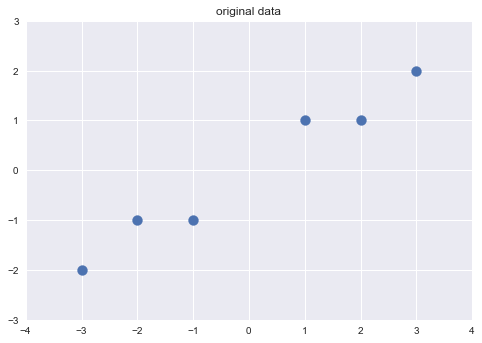

In [29]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
plt.scatter(X[:,0], X[:,1], s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("original data")
plt.grid(True)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
Z = pca.transform(X)
Z

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

In [8]:
w, V = np.linalg.eig(pca.get_covariance())
w
V

array([ 7.93954312,  0.06045688])

array([[ 0.83849224, -0.54491354],
       [ 0.54491354,  0.83849224]])

In [9]:
V.T.dot(X.T).T

array([[-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385],
       [ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385]])

(-4, 4)

(-3, 3)

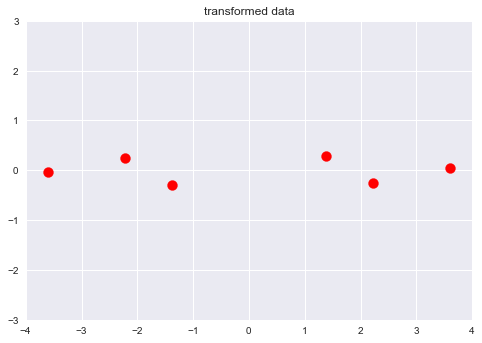

In [28]:
plt.scatter(Z[:, 0], Z[:,1], c='r', s=100)
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.title("transformed data")
plt.grid(True)

(-4, 4)

(-3, 3)

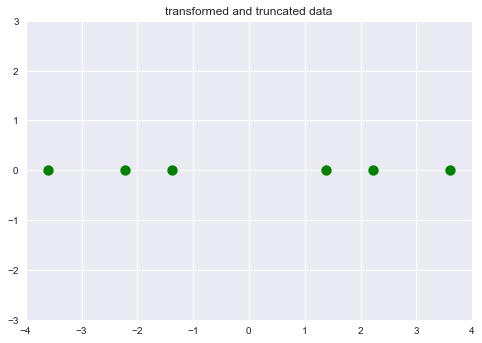

In [26]:
plt.scatter(Z[:, 0], np.zeros_like(Z[:, 1]), c='g', s=100)
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.title("transformed and truncated data")
plt.grid(True)

### 4. IRIS 데이터의 예

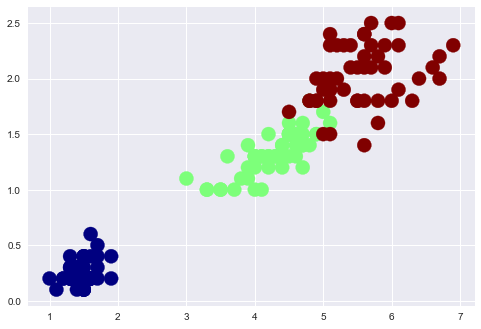

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:]
plt.scatter(X[:, 0], X[:, 1], c=iris.target, s=200, cmap=plt.cm.jet);
plt.grid(True)

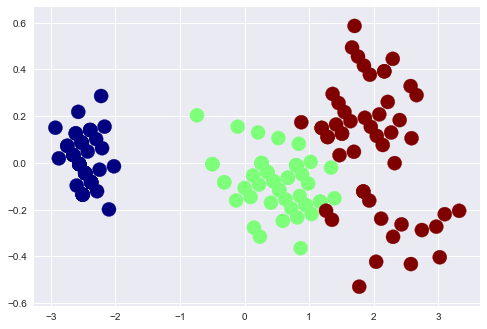

In [23]:
x2 = PCA(2).fit_transform(X)
plt.scatter(x2[:, 0], x2[:, 1], c=iris.target, s=200, cmap=plt.cm.jet)
plt.grid(True)

(-6, 6)

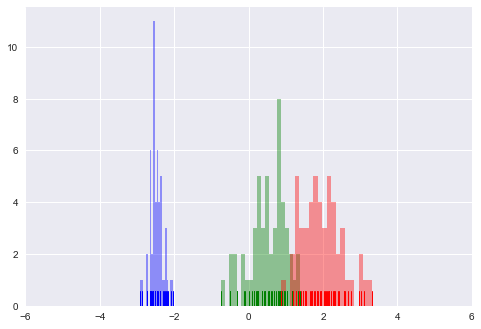

In [25]:
x1 = PCA(1).fit_transform(X)
sns.distplot(x1[iris.target==0], color="b", bins=20, rug=True, kde=False)
sns.distplot(x1[iris.target==1], color="g", bins=20, rug=True, kde=False)
sns.distplot(x1[iris.target==2], color="r", bins=20, rug=True, kde=False)
plt.xlim(-6, 6)

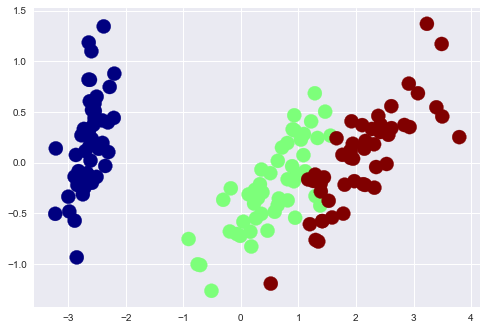

In [30]:
x3 = PCA(2).fit_transform(iris.data)
plt.scatter(x3[:, 0], x3[:, 1], c=iris.target, s=200, cmap=plt.cm.jet);

In [33]:
x4 = PCA(3).fit_transform(iris.data)

In [34]:
def plot_pca(azim):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x4[:, 0], x4[:, 1], x4[:, 2], c=iris.target, s=100, cmap=plt.cm.jet, alpha=1)
    ax.view_init(20, azim)

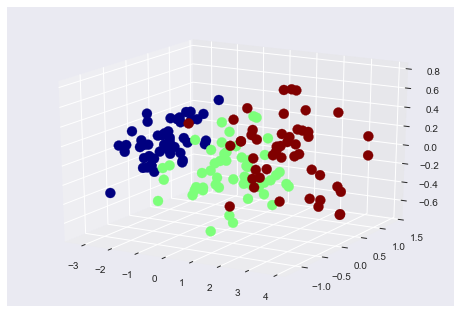

In [35]:
plot_pca(-60)

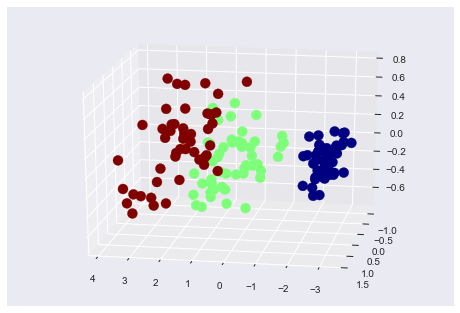

In [39]:
widgets.interact(plot_pca, azim=widgets.IntSlider(min=0, max=100, step=10, value=0))

### 5. 이미지 PCA

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

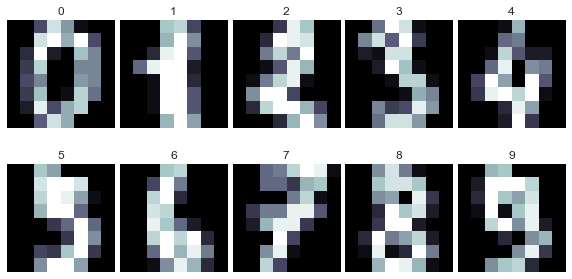

In [41]:
from sklearn.datasets import load_digits
digits = load_digits()
x_digits, y_digits = digits.data, digits.target

N=2; M=5;
fig = plt.figure(figsize=(10, 4))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone, interpolation="none")
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[k])

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(x_digits)
print(x_digits.shape)
print(X_pca.shape)

(1797, 64)
(1797, 10)


(-34.325746336084038,
 34.855952788484203,
 -30.392170759220015,
 32.990027524284926)

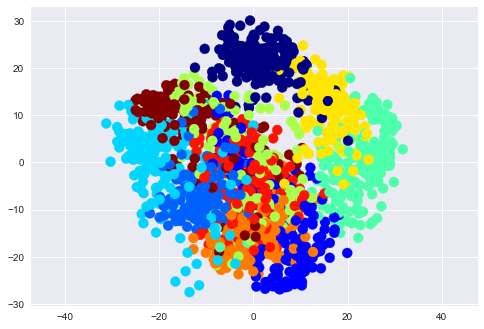

In [44]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_digits, s=100, cmap=plt.cm.jet)
plt.axis("equal")

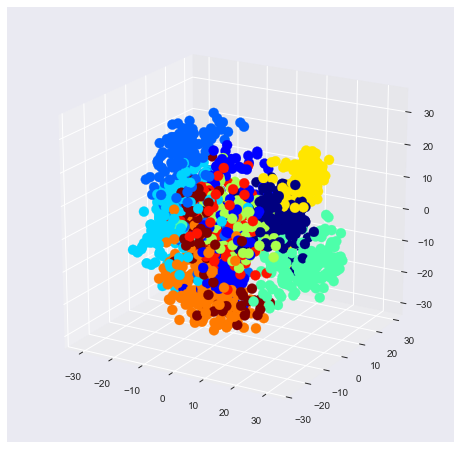

In [46]:
def plot_pca2(azim):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_digits, s=100, cmap=plt.cm.jet, alpha=1)
    ax.view_init(20, azim)

plot_pca2(-60)

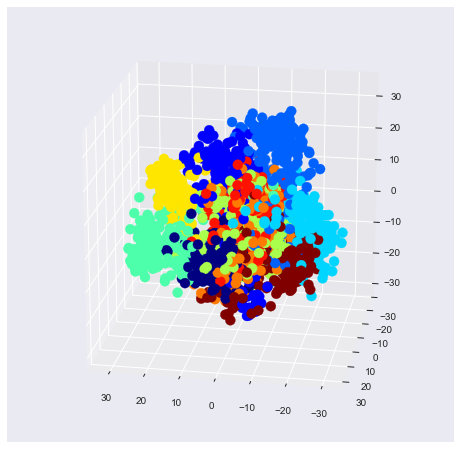

In [47]:
widgets.interact(plot_pca2, azim=widgets.IntSlider(min=0, max=100, step=10, value=0))

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

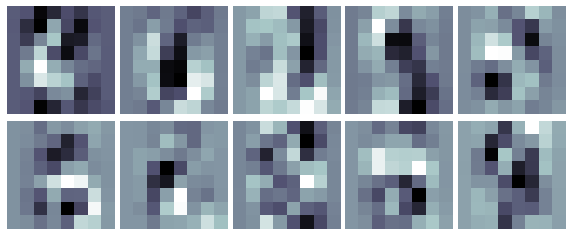

In [51]:
N=2; M=5;
fig = plt.figure(figsize=(10, 3.2))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        p = fig.add_subplot(N, M, k+1)
        p.imshow(pca.components_[k].reshape((8, 8)), cmap=plt.cm.bone, interpolation='none')
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

### 6. Kernal PCA
데이터의 분리성을 향상시키기 위해 비선형 변환 $\phi(x)$을 한 데이터에 대해서 다시 PCA를 적용하는 방법

$x \;\; \rightarrow \;\; \phi(x) \;\; \rightarrow \;\; \text{PCA} \;\; \rightarrow \;\; z$

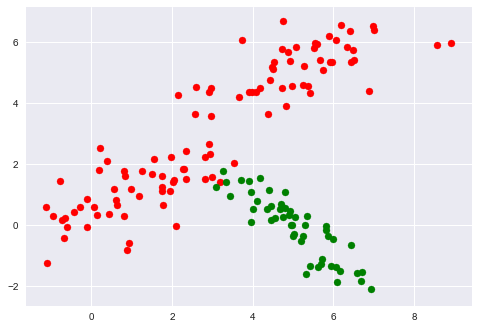

In [54]:
a1_mean = [1, 1]
a1_cov = [[2, 1], [1, 1]]
a1 = np.random.multivariate_normal(a1_mean, a1_cov, 50)
a2_mean = [5, 5]
a2_cov = [[2, 1], [1, 1]]
a2 = np.random.multivariate_normal(a2_mean, a2_cov, 50)
a = np.vstack([a1, a2])
b_mean = [5, 0]
b_cov = [[0.8, -0.7], [-0.7, 0.8]]
b = np.random.multivariate_normal(b_mean, b_cov, 50)
ab = np.vstack([a, b])

plt.scatter(a[:, 0], a[:, 1], c='r')
plt.scatter(b[:, 0], b[:, 1], c='g')

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

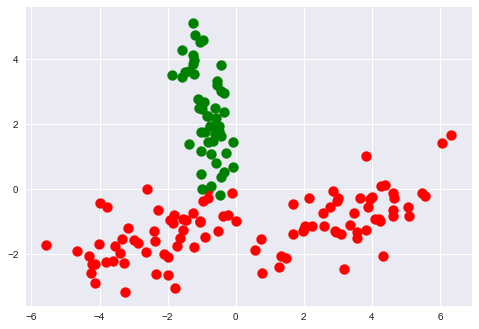

In [55]:
pca = PCA(n_components=2)
pca.fit(ab)
a_transformed = pca.transform(a)
b_transformed = pca.transform(b)
plt.scatter(a_transformed[:, 0], a_transformed[:, 1], c="r", s=100)
plt.scatter(b_transformed[:, 0], b_transformed[:, 1], c="g", s=100)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

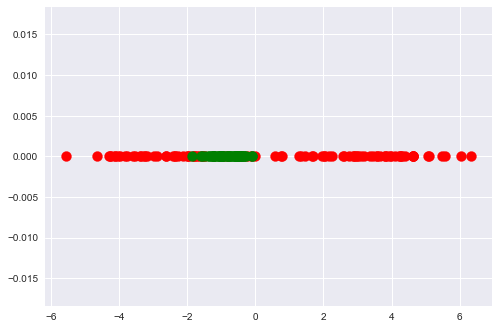

In [56]:
pca = PCA(n_components=1)
pca.fit(ab)
a_transformed = pca.transform(a)
b_transformed = pca.transform(b)
plt.scatter(a_transformed, np.zeros(len(a_transformed)), c="r", s=100)
plt.scatter(b_transformed, np.zeros(len(b_transformed)), c="g", s=100)

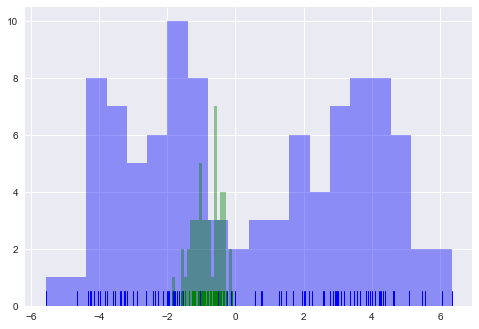

In [57]:
sns.distplot(a_transformed, color="b", bins=20, rug=True, kde=False)
sns.distplot(b_transformed, color="g", bins=20, rug=True, kde=False)

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='cosine',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)

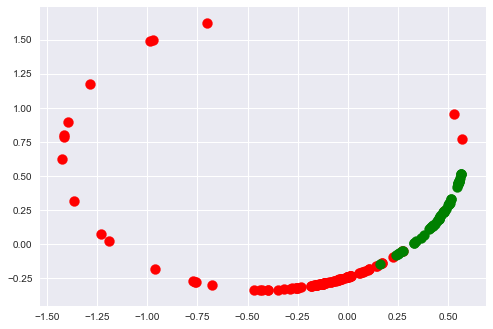

In [60]:
kpca = KernelPCA(kernel="cosine", n_components=2)
kpca.fit(ab)
a_transformed2 = kpca.transform(a)
b_transformed2 = kpca.transform(b)
plt.scatter(a_transformed2[:, 0], a_transformed2[:, 1], c="r", s=100)
plt.scatter(b_transformed2[:, 0], b_transformed2[:, 1], c="g", s=100)

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='cosine',
     kernel_params=None, max_iter=None, n_components=1, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)

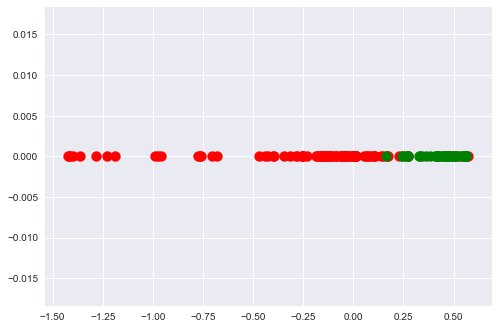

In [62]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel="cosine", n_components=1)
kpca.fit(ab)
a_transformed2 = kpca.transform(a)
b_transformed2 = kpca.transform(b)
plt.scatter(a_transformed2, np.zeros(len(a_transformed2)), c="r", s=100)
plt.scatter(b_transformed2, np.zeros(len(b_transformed2)), c="g", s=100)

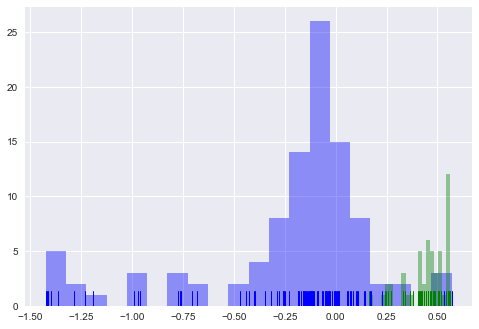

In [63]:
sns.distplot(a_transformed2, color="b", bins=20, rug=True, kde=False)
sns.distplot(b_transformed2, color="g", bins=20, rug=True, kde=False)

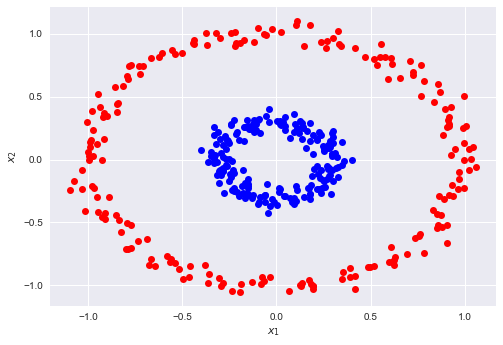

In [65]:
from sklearn.datasets import make_circles
np.random.seed(0)
x, y = make_circles(n_samples=400, factor=.3, noise=.05)
reds = y == 0
blues = y == 1
plt.plot(x[reds, 0], x[reds, 1], "ro")
plt.plot(x[blues, 0], x[blues, 1], "bo")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=True, gamma=10, kernel='rbf',
     kernel_params=None, max_iter=None, n_components=None, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)

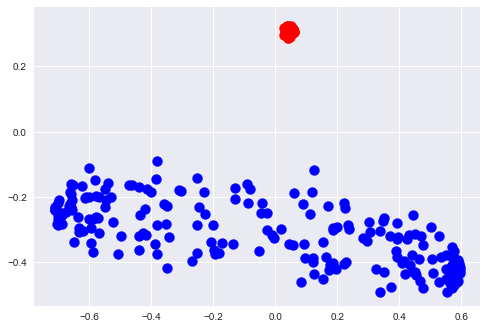

In [66]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
kpca.fit(x)
a_transformed2 = kpca.transform(x[reds])
b_transformed2 = kpca.transform(x[blues])
plt.scatter(a_transformed2[:, 0], a_transformed2[:, 1], c="r", s=100)
plt.scatter(b_transformed2[:, 0], b_transformed2[:, 1], c="b", s=100)

### 7. 성분 수의 결정
성분의 수가 같은 PCA로 변환된 데이터의 공분산 행렬의 고유값은 원래 데이터의 공분산 행렬의 고유값과 일치. 성분의 수를 줄여야 하는 경우에는 가장 고유값이 작은 성분부터 생략.

 - 원래의 데이터 $X$의 공분산 행렬 $X^TX$의 고유값
 
   $\lambda_1, \lambda_2, \lambda_3, \cdots, \lambda_D$

 - PCA 변환한 데이터 $Z$의 공분산 행렬 $Z^TZ$의 고유값
 
   $\lambda_1,  \cdots, \lambda_L$
 
 - Explained Variance
 
   $\dfrac{\lambda_1 +  \cdots + \lambda_L}{\lambda_1 + \lambda_2 + \lambda_3 + \cdots + \lambda_D} < 1$

<Container object of 13 artists>

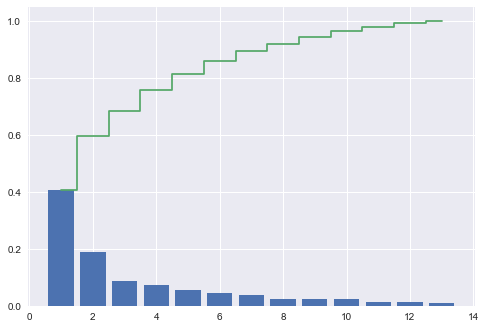

In [68]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA

wine = fetch_mldata("wine")
x, y = wine.data, wine.target

pca = PCA().fit(x)
var = pca.explained_variance_
cmap = sns.color_palette()
plt.bar(np.arange(1, len(var) + 1), var/np.sum(var), align="center", color=cmap[0])
plt.step(np.arange(1, len(var) + 1), np.cumsum(var)/np.sum(var), where="mid", color=cmap[1])

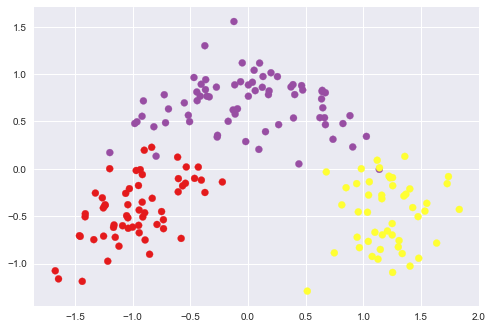

In [72]:
x_pca = PCA(2).fit_transform(x)
cmap = mpl.colors.ListedColormap(sns.color_palette("Set1"))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap=cmap)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

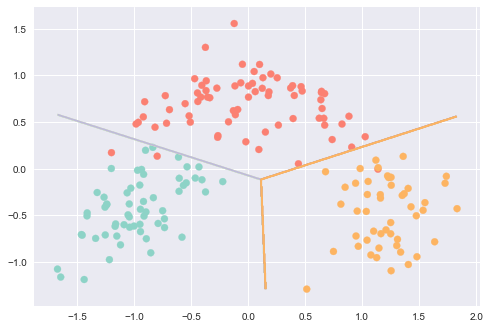

In [76]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_pca, y)

xmin, xmax = x_pca[:, 0].min(), x_pca[:, 0].max()
ymin, ymax = x_pca[:, 1].min(), x_pca[:, 1].max()
XGrid, YGrid = np.meshgrid(np.arange(xmin, xmax, (xmax - xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
ZGrid = np.reshape(clf.predict(np.array([XGrid.ravel(), YGrid.ravel()]).T), XGrid.shape)                           
cmap = mpl.colors.ListedColormap(sns.color_palette("Set3"))                  
plt.contour(XGrid, YGrid, ZGrid, cmap=cmap)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap=cmap)

### 8. 파이프라인

In [77]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline

digits = datasets.load_digits()
x_digits = digits.data
y_digits = digits.target

model1 = linear_model.LogisticRegression()
model1.fit(x_digits, y_digits)

pca = decomposition.PCA()
logistic = linear_model.LogisticRegression()
model2 = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
model2.fit(x_digits, y_digits)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_digits, model1.predict(x_digits)))
print(classification_report(y_digits, model2.predict(x_digits)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       178
          1       0.97      0.98      0.98       182
          2       1.00      1.00      1.00       177
          3       0.98      1.00      0.99       183
          4       1.00      1.00      1.00       181
          5       1.00      1.00      1.00       182
          6       1.00      1.00      1.00       181
          7       1.00      1.00      1.00       179
          8       0.98      0.97      0.97       174
          9       1.00      0.98      0.99       180

avg / total       0.99      0.99      0.99      1797

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       178
          1       0.97      1.00      0.98       182
          2       0.99      1.00      1.00       177
          3       0.99      0.99      0.99       183
          4       0.99      0.99      0.99       181
          5       0.99      0.99      0.99